In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud as WC


In [23]:
import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Sequential                # creating sequential model of CNN
from keras.layers import Conv2D                    # creating convolution layer
from keras.layers import MaxPooling2D              # creating maxpool layer
from keras.layers import Flatten                   # creating input vector for dense layer
from keras.layers import Dense                     # create dense layer or fully connected layer
from keras.layers import Dropout                   # use to avoid overfitting by droping some params
from keras.layers import BatchNormalization        # for batch normalization
from keras.layers import Input
from keras.layers import GlobalAveragePooling2D
from keras.layers import Embedding, LSTM, GRU
from keras.models import Model
from keras.utils import to_categorical
from sklearn.utils import class_weight
from keras.models import Sequential



from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
fake = pd.read_csv("Datasets/Fake.csv")
true = pd.read_csv("Datasets/True.csv")

In [4]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
true['labels'] = 1
fake['labels'] = 0
true_text = true.drop(["subject", "date","title"], axis=1)
fake_text = fake.drop(["subject", "date", "title"], axis=1)

In [7]:
fake_text.head()

,text,labels
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [8]:
data = pd.concat((true_text,fake_text), axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [9]:
true.shape

(21417, 5)

In [10]:
data['text'].iloc[0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

In [11]:
# delete stop words & tokenize the sentences
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
data_X = []
for items in data['text']:
    tmp = []
    sentences = nltk.sent_tokenize(items)
    for sentence in sentences:
        sentence = sentence.lower()
        filtered_words = [word.strip() for word in tokenizer.tokenize(sentence) if word not in stop_words and len(word) > 1]
        tmp.extend(filtered_words)
    data_X.append(tmp)    




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\schro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\schro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
data_X[0][:5]

['washington', 'reuters', 'head', 'conservative', 'republican']

In [13]:
# import gensim
 
embedding_vector_length = 100 # define dimensions for word vector space

# word_vectors = gensim.models.Word2Vec(sentences=data_X, size=embedding_vector_length)

# word_vectors['trump']

In [ ]:
# Function to create weight matrix from word2vec gensim model 
# We could use this to load the weights for the embedding layer in the neural nets
# We did not use it since we could just train the embedding layer and it still performs well

# def get_weight_matrix(model, vocab):
#     # total vocabulary size plus 0 for unknown words
#     vocab_size = len(vocab) + 1
#     # define weight matrix dimensions with all 0
#     weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
#     # step vocab, store vectors using the Tokenizer's integer mapping
#     for word, i in vocab.items():
#         weight_matrix[i] = model[word]
#     return weight_matrix

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_X)

data_X = tokenizer.texts_to_sequences(data_X)    
len(tokenizer.word_index)

121858

In [15]:
data_X[0][:5] # make texts to number arrays

[32, 10, 319, 208, 17]

In [17]:
tokenizer.word_index

{'trump': 1,
 'said': 2,
 'president': 3,
 'would': 4,
 'people': 5,
 'one': 6,
 'state': 7,
 'also': 8,
 'new': 9,
 'reuters': 10,
 'clinton': 11,
 'obama': 12,
 'donald': 13,
 'government': 14,
 'house': 15,
 'states': 16,
 'republican': 17,
 'year': 18,
 'could': 19,
 'united': 20,
 'told': 21,
 'like': 22,
 'white': 23,
 'two': 24,
 'campaign': 25,
 'time': 26,
 'election': 27,
 'last': 28,
 'party': 29,
 'news': 30,
 'first': 31,
 'washington': 32,
 'country': 33,
 'even': 34,
 'former': 35,
 'us': 36,
 'hillary': 37,
 'years': 38,
 'many': 39,
 'american': 40,
 'media': 41,
 'security': 42,
 'law': 43,
 'made': 44,
 'may': 45,
 'national': 46,
 'say': 47,
 'political': 48,
 'police': 49,
 'get': 50,
 'court': 51,
 'right': 52,
 'since': 53,
 'make': 54,
 'percent': 55,
 'twitter': 56,
 'according': 57,
 'going': 58,
 'republicans': 59,
 'russia': 60,
 'administration': 61,
 'back': 62,
 'presidential': 63,
 'america': 64,
 'week': 65,
 'bill': 66,
 'democratic': 67,
 'via': 68,
 

In [24]:
maxlen = 500 
data_X = pad_sequences(data_X, maxlen=maxlen) # padding to make sure there are 500 of words in each text element

In [25]:

#Defining Neural Network
model = Sequential([
    Embedding(len(tokenizer.word_index)+1 ,output_dim=embedding_vector_length, input_length=maxlen),
    GRU(units=128),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          12185900  
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               87936     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 12,273,965
Trainable params: 12,273,965
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Train test split
y = data['labels'].values
X_train, X_test, y_train, y_test = train_test_split(data_X, y) 

In [27]:
model.fit(X_train, y_train,epochs=2,validation_data=(X_test, y_test))

Train on 33673 samples, validate on 11225 samples
Epoch 1/2
33673/33673 [==============================] - 389s 12ms/step - loss: 0.1069 - acc: 0.9612 - val_loss: 0.0164 - val_acc: 0.9957
Epoch 2/2
33673/33673 [==============================] - 398s 12ms/step - loss: 0.0529 - acc: 0.9804 - val_loss: 0.0821 - val_acc: 0.9710


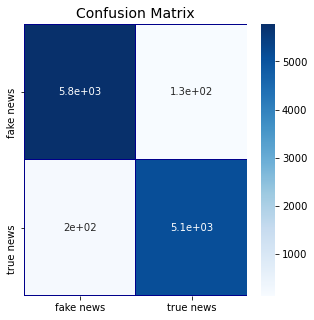

In [28]:
cm = confusion_matrix(y_test, model.predict(X_test)>0.5)
# cm = confusion_matrix(df_y_train, RF_clf_proba[:,1]>=0.5)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['fake news', 'true news'],
            yticklabels=['fake news', 'true news'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [29]:
y_pred_proba_test = model.predict(X_test)
y_pred_test = y_pred_proba_test>=0.5

print("ROC curve AUC:", roc_auc_score(y_test,y_pred_proba_test))
print("Accuracy for test set:", accuracy_score(y_test,y_pred_test))

ROC curve AUC: 0.9958619105473119
Accuracy for test set: 0.9709576837416481


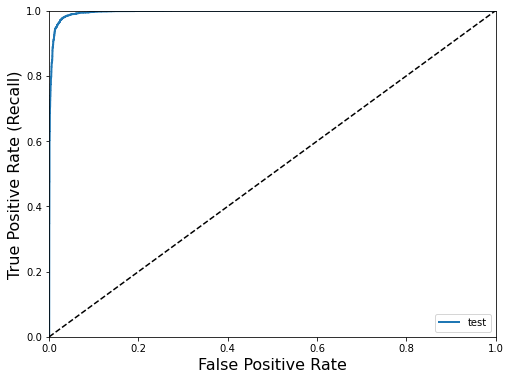

In [31]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba_test)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.legend()

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_test, tpr_test, 'test')
plt.show()